In [1]:
# Jared Beard
# Homework 1
# MAE 693 - Reinforcement Learning and Control
# Dr. Ali Baheri

# 26 February 2021

In [ ]:
#####################################################################
# NOTE: Some sections require user input. This was done to visualize
#       the value function more intuitively
#####################################################################

In [2]:
# References

## Blogs and Websites
# Reinforcement Learning: let’s teach a taxi-cab how to drive: <https://towardsdatascience.com/reinforcement-learning-lets-teach-a-taxi-cab-how-to-drive-4fd1a0d00529>
# OpenAI Gym Documentation: <https://gym.openai.com/docs/>

## Code
# Github: openai/gym/gym/envs/toy_text/taxi.py: <https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py>

## Textbooks
# Mykel J. Kochenderfer. Decision Making Under Uncertainty: Theory and Application


In [8]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import time

import gym

In [9]:
# Functions
def policy_iteration(env, policy_prev, epsilon,gamma=1.0):
    policy = np.copy(policy_prev)
    value = np.zeros(np.shape(policy_prev))
    value_prev = value
    diff = epsilon * 10
    k = 0
    # Put it in additional check to prevent false stopping
    while (diff > epsilon or k < 5): 
        # Policy Evaluation
        for i in range(500):
            index = env.decode(i)
            idx = list(index)
            env.s = i
            next_state, reward, done, info = env.step(policy_prev[idx[0]][idx[1]][idx[2]][idx[3]])
            li = list(env.decode(next_state))
            v = value_prev[li[0]][li[1]][li[2]][li[3]]
            value[idx[0]][idx[1]][idx[2]][idx[3]] = reward + gamma*v
        # Policy Iteration
        for i in range(500):
            index = env.decode(i)
            idx = list(index)
            policy_temp = np.zeros((6,1))
            for j in range(6):
                env.s = i
                next_state, reward, done, info = env.step(j)
                li = list(env.decode(next_state))
                v = value_prev[li[0]][li[1]][li[2]][li[3]]
                policy_temp[j] = reward + gamma*v
            policy[idx[0]][idx[1]][idx[2]][idx[3]] = np.argmax(policy_temp)
                                                         
        diff = np.sum(np.absolute(policy - policy_prev))
        print(diff)
        #print(policy_prev)
        #print('start')
        #print(policy)
        value_prev = np.copy(value)
        policy_prev = np.copy(policy)
        k += 1
        
    return policy, value

In [12]:
# Initialize setup
taxi_env  = gym.make("Taxi-v2").env
epsilon = 0.5
policy = np.zeros((5,5,5,4))
gamma = 0.99 # Don't use 1, this will cause it to run infinitely


In [13]:
# Run code
policy, value = policy_iteration(taxi_env, policy, epsilon, gamma)

20.0
0.0
26.0
3.0
27.0
14.0
52.0
24.0
64.0
21.0
65.0
21.0
68.0
24.0
56.0
19.0
51.0
26.0
61.0
34.0
64.0
43.0
64.0
37.0
52.0
29.0
30.0
12.0
16.0
8.0
9.0
3.0
1.0
0.0


['R', 'G', 'Y', 'B']
R: (0,0)
G: (0,4)
Y: (4,0)
B: (4,3)
 Enter Passenger Location (R,G,Y,B): R
 Enter Goal Location (R,G,Y,B): Y


Prior to picking up passenger at R


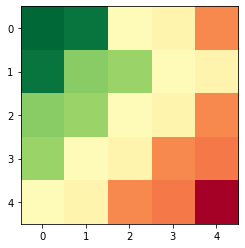



With passenger onboard, headed to Y


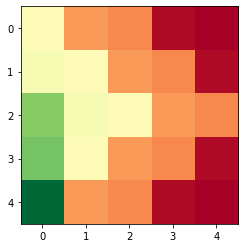

In [27]:
# Output value function
    # To check the value function, you must choose the desired
    # start and goal, to look at. This was done to visualize
    # how a user may look at a map. Green values are the largest

locations = ['R', 'G', 'Y', 'B']
print(locations)
print('R: (0,0)')
print('G: (0,4)')
print('Y: (4,0)')
print('B: (4,3)')
print('Coordinates are listed in (y,x) as done in simulation')
passenger = input(' Enter Passenger Location (R,G,Y,B): ')
goal = input(' Enter Goal Location (R,G,Y,B): ')

pass_idx = locations.index(passenger)
goal_idx = locations.index(goal)


print('\n')
print('Prior to picking up passenger at ' + passenger)
#print(value[:,:,pass_idx,goal_idx])
plt.imshow(value[:,:,pass_idx,goal_idx], cmap='RdYlGn', interpolation='nearest')
plt.show()


print('\n')
print('With passenger onboard, headed to ' + goal)
#print(value[:,:,4,goal_idx])
plt.imshow(value[:,:,4,goal_idx], cmap='RdYlGn', interpolation='nearest')
plt.show()
# Print value given passenger and goal coordinates
# maybe add some color coordination

#Print one prior to passenger pick up and one after

In [24]:
# Random Test Generator

taxi_env.reset()
rn1 = int(round(4*np.random.random()))
rn2 = int(round(4*np.random.random()))
rn3 = int(round(3*np.random.random()))
rn4 = int(round(3*np.random.random()))
idx = (rn1, rn2, rn3, rn4)
taxi_env.s = taxi_env.encode(rn1,rn2,rn3,rn4)
taxi_env.render()

done = False
while (not done):
    next_state, reward, done, info = taxi_env.step(int(policy[idx[0]][idx[1]][idx[2]][idx[3]]))
    idx = list(taxi_env.decode(next_state))
    print(idx)
    print(policy[idx[0]][idx[1]][idx[2]][idx[3]])
    taxi_env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

[2, 0, 0, 0]
1.0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
[1, 0, 0, 0]
1.0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
[0, 0, 0, 0]
4.0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
[0, 0, 4, 0]
5.0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
[0, 0, 0, 0]
4.0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
